### Group 1
Mandar Kathe

Samuel Vélez

## STEP 1: 

### Describe your dataset: where does the data come from, why was it created, when and how was it collected?

-------------------------------------------------------------------------------

## Project title: 
### *Project title*

This data set was collected and published by a team of chemical engineering researchers including Dr. Liang-Shih Fan and Dr. Mandar Kathe and was focused on investigating the improvement of energy efficiency with regards to the general category of systems related to metal-oxide reaction engineering work for a novel energy conversion technology.

The proposed technology if sucessfully commercialized has the potential to reduce the cost of Gas-to-Liquids systems by more than 30% resulting in transformative
energy and cost benefits.

The researchers for their initial work generated around 10 million data points, with >17 sparese predictor variables and attempted to do a multi-objective
optimization as detailed in the research study here: **Sandvik, P., Kathe, M., Wang, W., Kong, F., & Fan, L. S. (2018). High-pressure chemical looping reforming processes: system analysis for syngas generation from natural gas and reducing tail gases. Energy & Fuels, 32(10), 10408-10420.**

However, during the study, the researchers struggled in effectively utilizing the complete dataset. 

The team of Samuel Velez and Mandar Kathe took on the challenge to explore the dataset and attempt to improve on the work previously published using
just the visualization methods learnt in this class



## STEP 2: Load the dataset

------------------------------------------

In [1]:
import altair as alt
import pandas as pd
merged = pd.read_csv("merged_dataset.csv")



## STEP 5: Data Wrangling before Step 3 for initial exploration

------------------------------------------

The data wrangling was challenging as the dataset initially was collected a series of discrete files generated from a true function using the commercially available ASPEN PLUS simulator (https://www.aspentech.com/en/products/engineering/aspen-plus).

The data set contained some of the variables in the name of excel files, some other variables in sheet names, and contains both discrete factor variables and continuous variables. 

The data was combined into a single csv file and then cleaned up for NA values with appropriate wrangling statistics. 

The original script is too extensive to be included here, however if required, the team can provide access to the original wrangling script.

Beyond the combination, the team also had to develop some specific aggregation functions, including adding and removing columns and then performing some additional wrangling as given in the script below.

The process of data vizualization itself resulted in us defining additional new variables and a ratio analysis, so the code below contains the final code snippet of data wrangling stuff and the team sought to focus on presenting the
main summary of the code that resulted in the final product.


In [2]:
merged.columns = merged.columns.str.replace(' ', '')
merged.columns = merged.columns.str.replace('/', '_')
merged["FE203FLOWRATE"] = (merged["FE2O3KMOL_HR"]*2 + merged["FE3O4KMOL_HR"]*3+ merged["FEOKMOL_HR"] + merged["FETIO3KMOL_HR"] + merged["FEKMOL_HR"])/2
merged["H2_CO_RATIO"] = (merged["H2KMOL_HR"]/merged["COKMOL_HR"])
merged["H2_PLUS_CO"] = merged["H2KMOL_HR"] + merged["COKMOL_HR"]
temperature_condition = (merged["COMBTC"] - merged["REDTC"]) > 0
ratio_condition = ((merged["H2_CO_RATIO"] >= 2.18) & (merged["H2_CO_RATIO"] <=2.2))
merged = merged[temperature_condition]
merged.columns = merged.columns.str.replace('VARY2H2OINMIXEDTOTALMOLEFLOWKMOL_HR', 'CO2_in')
merged.columns = merged.columns.str.replace('VARY1CO2INMIXEDTOTALMOLEFLOWKMOL_HR', 'H2O_in')

merged["H2in_PLUS_COin"] = merged["H2O_in"] + merged["CO2_in"]

merged["H20IN_H2OUT_RATIO"] = merged["H2O_in"] /merged["H2KMOL_HR"]
merged["CO2IN_CO2OUT_RATIO"] = merged["CO2_in"] /merged["COKMOL_HR"]

merged["INS_OUTS_RATIO"] = (merged["CO2_in"] + merged["H2O_in"]) / (merged["COKMOL_HR"] + merged["H2KMOL_HR"])


merged["temperature"] = merged["temperature"].astype("category")
merged["pressure"] = merged["pressure"].astype("category")
merged["ITCMO_support_fraction"] = merged["ITCMO_support_fraction"].astype("category")

merged_subset = merged[ratio_condition].reset_index()[["H2KMOL_HR","COKMOL_HR","H2_CO_RATIO","H2_PLUS_CO", "CO2_in", "H2O_in", "temperature", "Fe203_flowrate", "ITCMO_support_fraction","factor_compressor","pressure","H2in_PLUS_COin","H20IN_H2OUT_RATIO","CO2IN_CO2OUT_RATIO","INS_OUTS_RATIO"]]

## STEP 3: 

### Explore your dataset: Look at the columns using describe and summary, which ones are interesting, relevant?


----------------------------------------------------------



Exploring the reduced order data set, we see that the aggregaton functions are in column 2 and 3 with H2+CO and H2/CO being most relevant

The variables to be explored include The CO2 input (column 4), the H2O input (column 5), different factors like temperature (column 6), pressure (column 7).

In [6]:
alt.data_transformers.disable_max_rows()
merged_subset.describe()
merged_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   H2KMOL_HR               3186 non-null   float64 
 1   COKMOL_HR               3186 non-null   float64 
 2   H2_CO_RATIO             3186 non-null   float64 
 3   H2_PLUS_CO              3186 non-null   float64 
 4   CO2_in                  3186 non-null   int64   
 5   H2O_in                  3186 non-null   int64   
 6   temperature             3186 non-null   category
 7   Fe203_flowrate          3186 non-null   int64   
 8   ITCMO_support_fraction  3186 non-null   category
 9   factor_compressor       701 non-null    float64 
 10  pressure                3186 non-null   category
 11  H2in_PLUS_COin          3186 non-null   int64   
 12  H20IN_H2OUT_RATIO       3186 non-null   float64 
 13  CO2IN_CO2OUT_RATIO      3186 non-null   float64 
 14  INS_OUTS_RATIO          

In [7]:
H2_PLUS_CO_VS_RATIO = alt.Chart(merged_subset).mark_point().encode(
    alt.X("H2_PLUS_CO"),
    alt.Y('H2_CO_RATIO', scale=alt.Scale(domain=(2.18,2.2)))
    )

df1=merged_subset[["H2KMOL_HR","COKMOL_HR","H2_PLUS_CO"]].melt(id_vars='H2_PLUS_CO')
df1
H2_O2_VS_RATIO = alt.Chart(df1).mark_line().encode(
    alt.Y("value", title = "Content per hour"),
    alt.X('H2_PLUS_CO', title = "Total H2 + CO"),
    color = "variable"
    )

H2_PLUS_CO_VS_RATIO | H2_O2_VS_RATIO

alt.HConcatChart(...)

In [8]:
#CO and H2 ins
h20_in_vssum = alt.Chart(merged_subset).mark_circle(opacity = 0.7).encode(
    alt.Y("H2_PLUS_CO", title = "H2 plus CO"),
    alt.X('H2O_in', title = "H20 Input")
    )
co2_in_vssum = alt.Chart(merged_subset).mark_circle(opacity = 0.8).encode(
    alt.Y("H2_PLUS_CO", title = "H2 plus CO"),
    alt.X('CO2_in', title = "CO2 Input")
    )
test1 = alt.Chart(merged_subset).mark_point().encode(
    alt.Y("H2_PLUS_CO", title = "H2 plus CO"),
    alt.X('H2in_PLUS_COin', title = "H2 input plus CO input")
    )

merged_subset_50 = (merged_subset["H2_PLUS_CO"] > 50000) & (merged_subset["temperature"] != "ERROR")


inout_H2 = alt.Chart(merged_subset[merged_subset_50], title = "H2 Input / H2 Output vs Total H2+CO").mark_circle(opacity = 0.7).encode(
    alt.Y("H2_PLUS_CO", title = "H2 plus CO", scale=alt.Scale(domain=(50000,70000))),
    alt.X('H20IN_H2OUT_RATIO', title = "H2 input / H2 output"),
    color=alt.Color('pressure',
                   scale=alt.Scale(
            domain=['1', '10', "20", "30"],
            range=['#ff7f0e', '#2ca02c', "#1f77b4", "black"]))
    )

inout_CO = alt.Chart(merged_subset[merged_subset_50], title = "CO Input / CO Output vs Total H2+CO").mark_circle(opacity = 0.7).encode(
    alt.Y("H2_PLUS_CO", title = "H2 plus CO", scale=alt.Scale(domain=(50000,70000))),
    alt.X('CO2IN_CO2OUT_RATIO', title = "CO2 input / CO2 output"),
    color=alt.Color('pressure',
                   scale=alt.Scale(
            domain=['1', '10', "20", "30"],
            range=['#ff7f0e', '#2ca02c', "#1f77b4", "black"]))
    )

sum_inout_pressure = alt.Chart(merged_subset[merged_subset_50], title = "Total inputs/Total Output vs Total H2+CO").mark_circle(opacity = 0.7).encode(
    alt.Y("H2_PLUS_CO", title = "H2 plus CO", scale=alt.Scale(domain=(50000,70000))),
    alt.X('INS_OUTS_RATIO', title = "Total Inputs / Total outputs"),
    color=alt.Color('pressure',
                   scale=alt.Scale(
            domain=['1', '10', "20", "30"],
            range=['#ff7f0e', '#2ca02c', "#1f77b4", "black"])
            )
    )

sum_inout_itcmo = alt.Chart(merged_subset[merged_subset_50], title = "Total inputs/Total Output vs Total H2+CO").mark_circle(opacity = 0.7).encode(
    alt.Y("H2_PLUS_CO", title = "H2 plus CO", scale=alt.Scale(domain=(50000,70000))),
    alt.X('INS_OUTS_RATIO', title = "Total Inputs / Total outputs"),
    color=alt.Color('ITCMO_support_fraction',
                   scale=alt.Scale(
            domain=["55", "66", "85"],
            range=['#ff7f0e', '#2ca02c', "darkgrey"]))
    )

h20_in_vssum | co2_in_vssum

alt.HConcatChart(...)

In [99]:
inout_H2 | inout_CO | sum_inout_pressure

alt.HConcatChart(...)

In [101]:
sum_inout_itcmo

alt.Chart(...)

## STEP 6:  Research questions. Aim for descriptive or exploratory questions


### Research Question #1

The first research question the team tried to answer was what combination of variables could be visualized so that the syngas generated (combination of H2+CO) is maximized for the specific (H2/CO ratio of 2.19 from the original manuscript).

More specifically the research question evolved into if there are any set of variables that could adequately describe the visualization between 



The first research question our group chose to investigate probes at potential methods to simplify the research model proposed in the data collector's research paper. Specifically, authors of the study proposed a series of models that aim to identify a mathematical function that results in distinguishing of sexual dimorphism. The predictor variables include culmen length, flipper length, culmen depth amongst others.
Our initial thoughts were along the lines of, is it valid to initially look at only a single predictor variable to distinguish between males and females of the penguin species studied. Upon literature search we found that there are studies on different species that aim to look at single predictor variables (Example peer-reviewed research study: https://scholarworks.boisestate.edu/cgi/viewcontent.cgi?article=1012&context=rrc_facpubs ) The study in the link concludes that culmen length alone is the most effective measure for differentiating between sexes for the penguin species studied in the link.

**Research Question 1 Statement (Three subquestions):** 
- Can Culmen length alone be used to differentiate between sexes of penguins ? 
- Are other predictor variables (one at a time) including flipper length, culmen depth and bodymass useful in differentiating between males and female for the penguin species ? 
-  Which species could be differentiated based on these single predictor variables ?The research questions explain the rationalization a little bit more.



------------------------------------------

In [49]:
df1=merged_subset[["temperature","H2_PLUS_CO"]].melt(id_vars=['H2_PLUS_CO'])
df1
temperature_h2_co = alt.Chart(df1, title = "Temperature per Total H2 + CO").transform_density(
    'H2_PLUS_CO',
    as_=['H2_PLUS_CO', 'density'],
    # extent=[5, 50],
    groupby=['value']
).mark_area(orient='horizontal').encode(
    y='H2_PLUS_CO:Q',
    color='value:N',
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True)
    ),
    # facet=alt.Facet(column = 'variable:O'),
    column=alt.Column(
        'value:N',
        header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0
        )
    )
).properties(
    width=100
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

temperature_h2_co

alt.Chart(...)

In [90]:
df1=merged_subset[["pressure","H2_PLUS_CO"]].melt(id_vars=['H2_PLUS_CO'])
df1
pressure_h2_co = alt.Chart(df1, title = "Pressure per Total H2 + CO").transform_density(
    'H2_PLUS_CO',
    as_=['H2_PLUS_CO', 'density'],
    # extent=[5, 50],
    groupby=['value']
).mark_area(orient='horizontal').encode(
    y='H2_PLUS_CO:Q',
    color='value:N',
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True)
    ),
    # facet=alt.Facet(column = 'variable:O'),
    column=alt.Column(
        'value:N',
        header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0
        )
    )
).properties(
    width=100
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

pressure_h2_co

alt.Chart(...)

In [45]:
df1=merged_subset[["Fe203_flowrate","H2_PLUS_CO"]].melt(id_vars=['H2_PLUS_CO'])
df1
flowrate_h2_co = alt.Chart(df1, title = "Fe 203 Flowrate per Total H2 + CO").transform_density(
    'H2_PLUS_CO',
    as_=['H2_PLUS_CO', 'density'],
    # extent=[5, 50],
    groupby=['value']
).mark_area(orient='horizontal').encode(
    y='H2_PLUS_CO:Q',
    color='value:N',
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True)
    ),
    # facet=alt.Facet(column = 'variable:O'),
    column=alt.Column(
        'value:N',
        header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0
        )
    )
).properties(
    width=100
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

flowrate_h2_co

alt.Chart(...)

### Research Question #2

**Research Question 2 Statement:**

## STEP 7
**Data analysis and visualization: Create visualizations, and explain why you chose them, that will help you answer your research question**

------------------------------------


Warning message:
"Removed 9 rows containing non-finite values (stat_ydensity)."


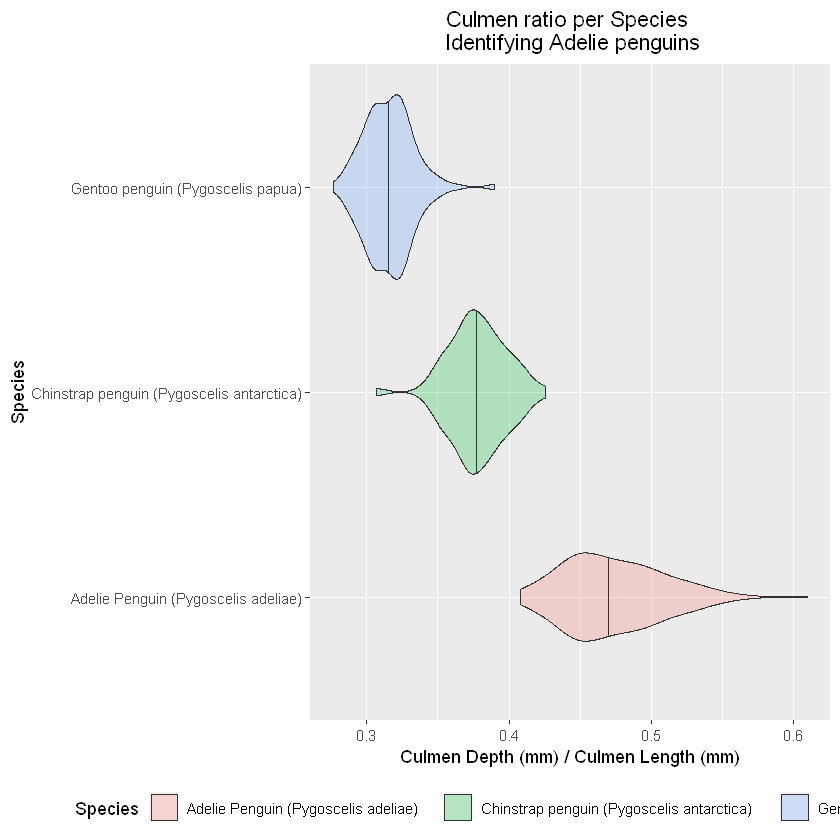

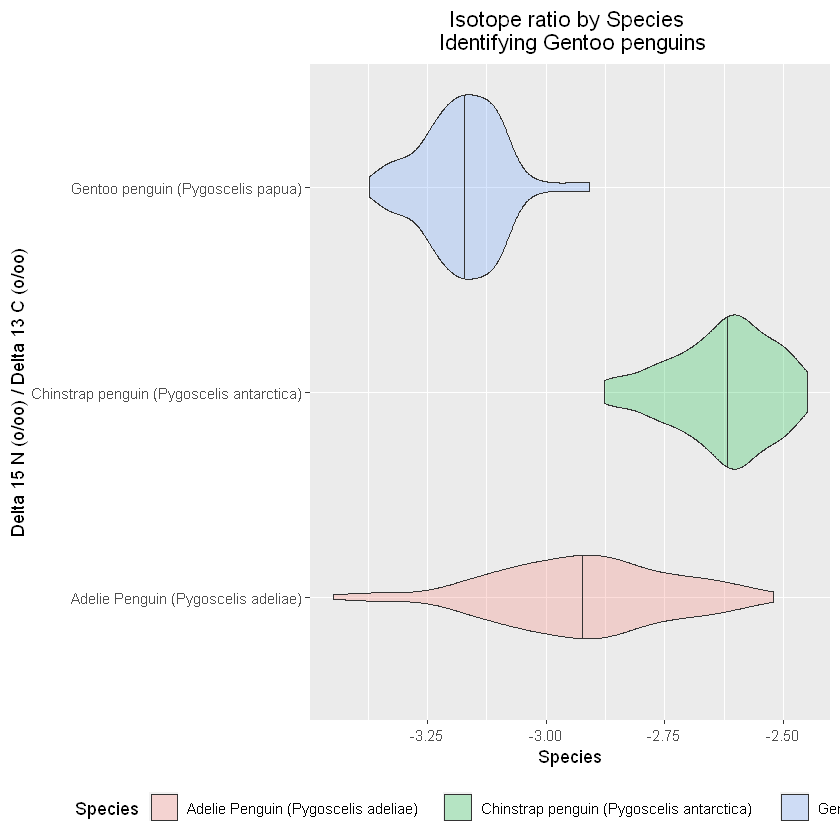

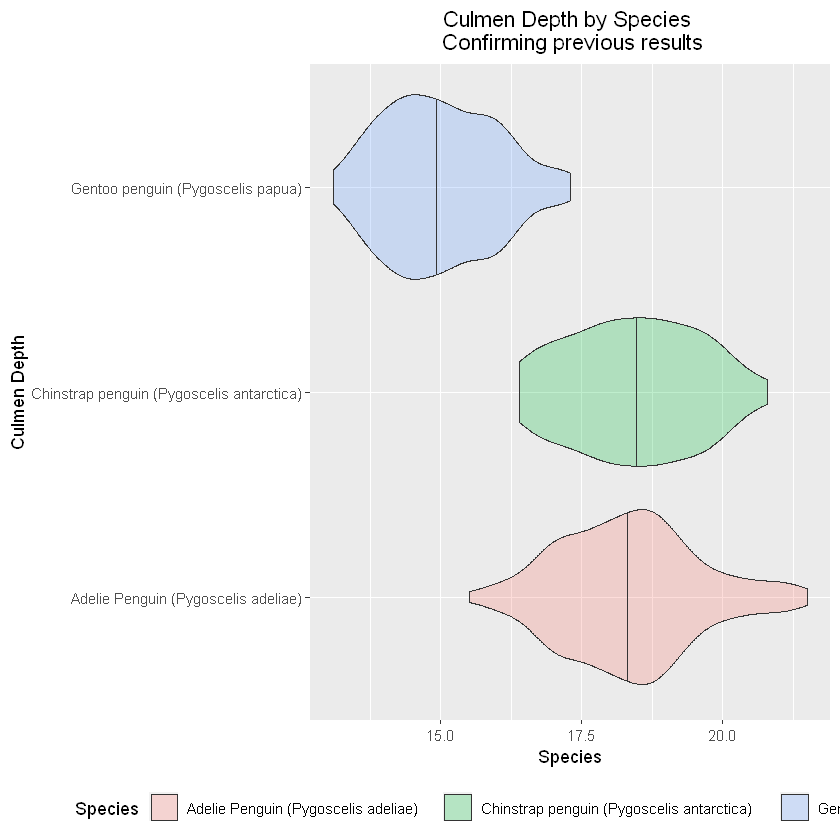

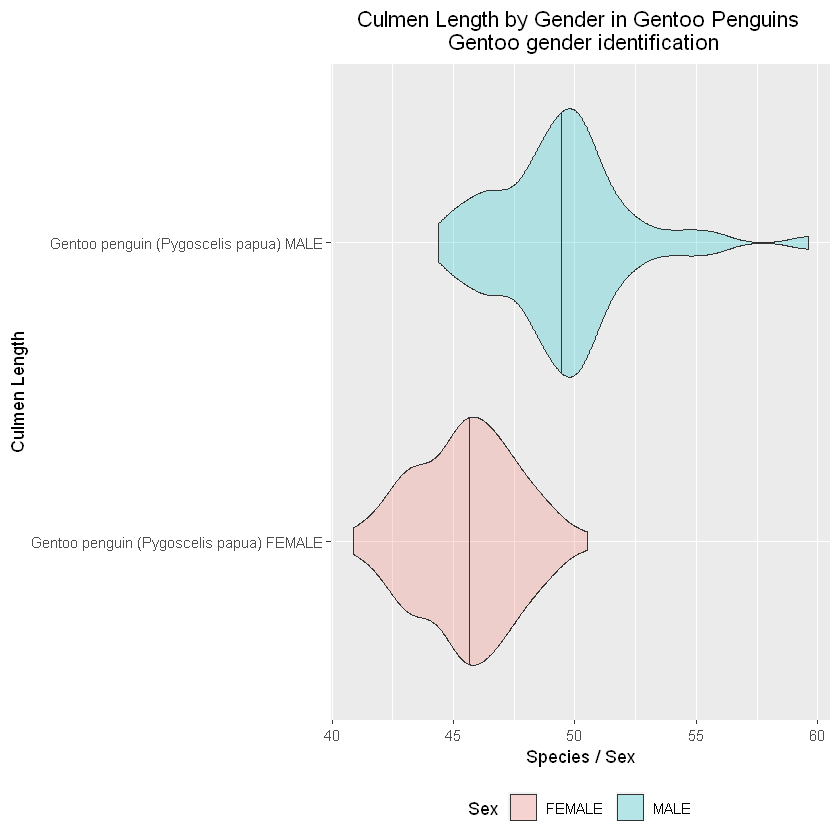

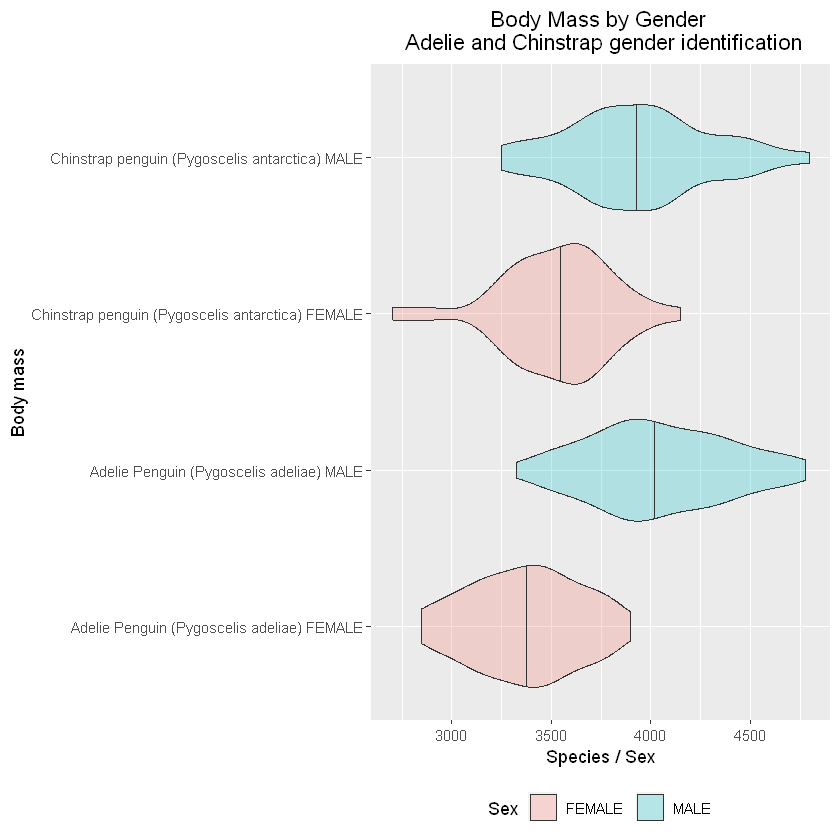

## STEP 8
**Conclusions and future research questions**

------------------------------------